# Linear Regression - Least Squares  

-------------  

_Author: Khal Makhoul, W.P.G.Peterson_  

## Project Guide
----------------  
- [Project Overview](#overview)
- [Introduction and Review](#intro)
- [Data Exploration](#data)  
- [Coding Linear Regression](#code)

<a id = "overview"></a>
## Project Overview
----------
#### EXPECTED TIME 2 HRS

This assignment will test your ability to code your own version of least squares regression in `Python`. After a brief review of some of the content from the lecture you will be asked to create a number of functions that will eventually be able to read in raw data to `Pandas` and perform a least squares regression on a subset of that data.  

This will include:  
- Calculating least squares weights
- reading data on dist to return `Pandas` DataFrame  
- select data by column  
- implement column cutoffs  

** Motivation**: Least squares regression offer a way to build a closed-form and interpretable model.  

**Objectives**: This assignment will:
- Test `Python` and `Pandas` competency
- Ensure understanding of the mathematical foundations behind least squares regression  

**Problem**: Using housing data, we will attempt to predict house price using living area with a regression model.  

**Data**: Our data today comes from [Kaggle's House Prices Dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).  

See above link for Description of data from `Kaggle`.  

<a id = "intro"></a>
### Introduction and Review

As long as a few basic assumptions are fulfilled, linear regression using least squares is solvable exactly, without requiring approximation. 

This means that the equations presented in the week 1 lectures can be adapted directly to `Python` code, making this good practice both for using `Python` and translating an "algorithm" to code.

We will use the matrix version of the least squares solution presented in lecture to derive the desired result. As a reminder, this expresses the least squares coefficients $w_{LS}$ as a vector, and calculates that vector as a function of $X$, the matrix of inputs, and $y$, the vector of outputs from the training set:

$$w_{LS} = (X^T X)^{−1}X^T y,$$

where $w_{LS}$ refers to the vector of weights we are trying to find, $X$ is the matrix of inputs, and $y$ is the output vector. 

In this equation, $X$ is always defined to have a vector of $1$ values as its first column. In other words, even when there is only one input value for each data point, $X$ takes the form:

$$
X = \begin{bmatrix}
1 \  x_{11}  \\
1 \  x_{21}  \\
\vdots \ \vdots \\
1 \ x_{n1}
\end{bmatrix} 
$$

For two inputs per data point, $X$ will take this form:
 
$$
X = \begin{bmatrix}
1 \  x_{11} \  x_{12} \\
1 \  x_{21} \  x_{22} \\
\vdots \ \vdots \\
1 \ x_{n1} \  x_{n2}
\end{bmatrix} 
$$




Please refer to lecture notes for additional context.  
<a id = "data"></a>
### Data Exploration

Before coding an algorithm, we will take a look at our data using `Python`'s `pandas`. For visualizations we'll use `matplotlib`. Familiarity with these modules will serve you well. The following cells include comments to explain the purpose of each step.

In [1]:
### This cell imports the necessary modules and sets a few plotting parameters for display

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
### Read in the data
tr_path = '../resource/asnlib/publicdata/train.csv'
test_path = '../resource/asnlib/publicdata/test.csv'
data = pd.read_csv(tr_path)

In [3]:
### The .head() function shows the first few lines of data for perspecitve
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
### Lists column names
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
### GRADED
### How many columns are in `data`?
### assign int answer to ans1
### YOUR ANSWER BELOW

ans1 = 81

In [6]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


#### Visualizations

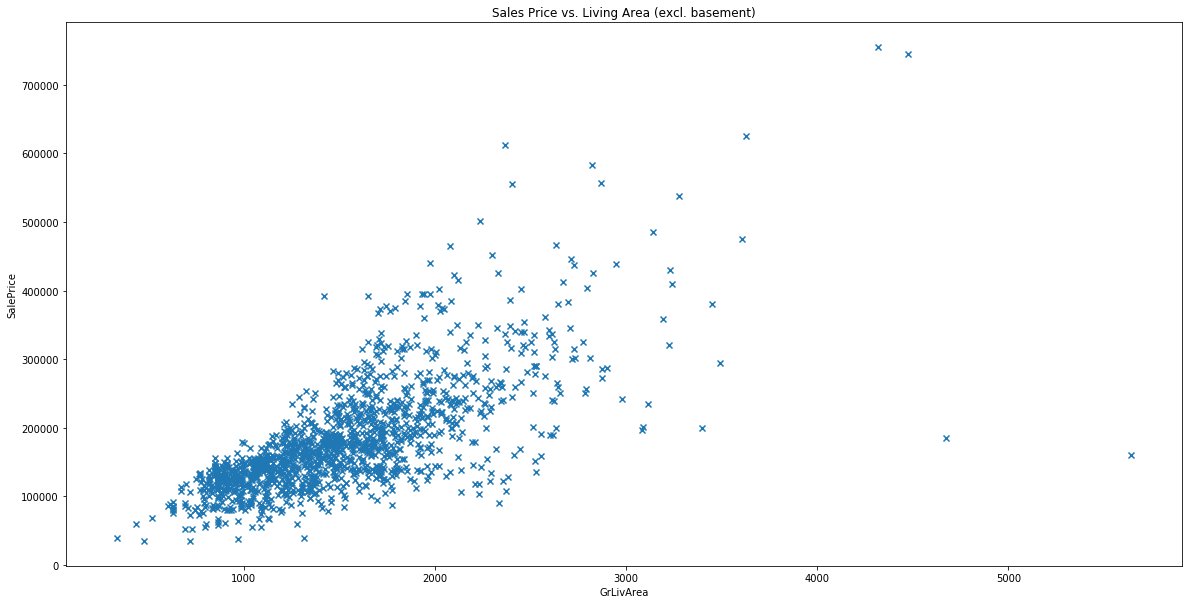

In [7]:
### We can plot the data as follows
### Price v. living area
### with matplotlib

Y = data['SalePrice']
X = data['GrLivArea']

plt.scatter(X, Y, marker = "x")

### Annotations
plt.title("Sales Price vs. Living Area (excl. basement)")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice");

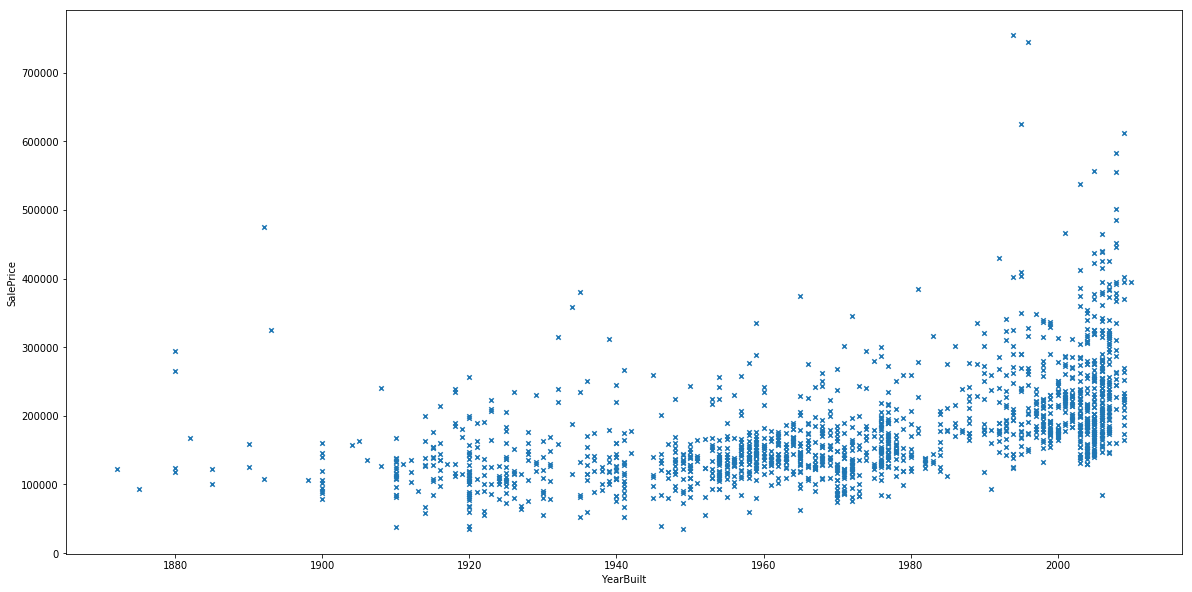

In [8]:
### price v. year
### Using Pandas

data.plot('YearBuilt', 'SalePrice', kind = 'scatter', marker = 'x');

In [9]:
### GRADED
### Given the above graphs, it appears there is a:  
### True) positive correlation between the variables
### False) negative correlation between the variables
### Assign boolean corresponding to choice to ans1
### YOUR ANSWER BELOW

ans1 = True

In [10]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


### Submission Instructions

You will have to ensure that the function names match the examples provided.

The code will be automatically graded by a script that will take your code as input and execute it. In order for the grading script to work properly, you must follow the naming conventions in this assignment stub.  

<a id = "code"></a>
### Coding Linear Regression
Given the equation above for $w_{LS}$, we know all we need to in order to solve a linear regression. Coding out the steps in `Python`, we will complete the process in several steps.

#### Matrix Operations
Below is an example of a function that takes the inverse of a matrix. The `numpy` module is used, and all the function does is call the `numpy` function `np.linalg.inv()`. Though simple, this can be used as a template for a few good coding practices:

* Name functions and parameters descriptively
* Use underscores _ to separate words in variable/function names (snake_case, **NOT** PascalCase or camelCase)
* In functions and classes, include a docstring between triple quotes 

In [11]:
### GRADED
### Build a function that takes as input a matrix
### return the inverse of that matrix
### assign function to "inverse_of_matrix"
### YOUR ANSWER BELOW

def inverse_of_matrix(mat):
    """Calculate and return the multiplicative inverse of a matrix.
    
    Positional argument:
        mat -- a square matrix to invert
    
    Example:
        sample_matrix = [[1, 2], [3, 4]]
        the_inverse = inverse_of_matrix(sample_matrix)
        
    Requirements:
        This function depends on the numpy function `numpy.linalg.inv`. 
    """
    matrix_inverse = np.linalg.inv(mat)
    return matrix_inverse

### Testing function:

print("test",inverse_of_matrix([[1,2],[3,4]]), "\n")
print("From Data:\n", inverse_of_matrix(data.iloc[:2,:2]))

test [[-2.   1. ]
 [ 1.5 -0.5]] 

From Data:
 [[-0.2   0.6 ]
 [ 0.02 -0.01]]


In [12]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


#### Q1: Read Data

In [13]:
### GRADED
### In order to create any model it is necessary to read in data
### Build a function called "read_to_df" that takes the file_path of a .csv file.
### Use a pandas functions appropriate for .csv files to turn that path into a DataFrame
### Use pandas function defaults for reading in file
### Return that DataFrame
### Grade will be determined by whether or not the returned item is of type "DataFrame" and
### if the dimensions are correct
### YOUR ANSWER BELOW
import pandas as pd
def read_to_df(file_path):
    """Read on-disk data and return a dataframe."""
    
    return pd.read_csv(file_path)

In [14]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


#### Q2: Select by Columns

In [15]:
### GRADED
### Build a function called "select_columns"
### As inputs, take a DataFrame and a *list* of column names.
### Return a DataFrame that only has the columns specified in the list of column names
### Grading will check type of object, dimensions of object, and column names
### YOUR ANSWER BELOW

def select_columns(data_frame, column_names):
    """Return a subset of a data frame by column names.

    Positional arguments:
        data_frame -- a pandas DataFrame object
        column_names -- a list of column names to select

    Example:
        data = read_into_data_frame('train.csv')
        selected_columns = ['SalePrice', 'GrLivArea', 'YearBuilt']
        sub_df = select_columns(data, selected_columns)
    """

    return data_frame[column_names]

In [16]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


#### Q2a:

In [17]:
### GRADED
### For a `Pandas` DataFrame named `df`, the names of columns may be accessed by the:
### `df.columns` attribute.
### The names of the rows may be accessed by the `df.<ans1>` attribute
### to ans1 assign a string that when placed after `df.` will return the row names
### of a DataFrame
### YOUR ANSWER BELOW

ans1 = 'index'

In [18]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


#### Q3: Subset Data by Value

In [19]:
### GRADED
### Build a function called "column_cutoff"
### As inputs, accept a Pandas Dataframe and a list of tuples.
### Tuples in format (column_name, min_value, max_value)
### Return a DataFrame which excludes rows where the value in specified column exceeds "max_value"
### or is less than "min_value"
### ### NB: DO NOT remove rows if the column value is equal to the min/max value
### YOUR ANSWER BELOW

def column_cutoff(data_frame, cutoffs):
    """Subset data frame by cutting off limits on column values.
    
    Positional arguments:
        data -- pandas DataFrame object
        cutoffs -- list of tuples in the format: 
        (column_name, min_value, max_value)
        
    Example:
        data_frame = read_into_data_frame('train.csv')
        # Remove data points with SalePrice < $50,000
        # Remove data points with GrLiveAre > 4,000 square feet
        cutoffs = [('SalePrice', 50000, 1e10), ('GrLivArea', 0, 4000)]
        selected_data = column_cutoff(data_frame, cutoffs)
    """
    for tup in cutoffs:
        # exclude lower
        data_frame = data_frame[data_frame[tup[0]] >= tup[1]]
        #exclude higher
        data_frame = data_frame[data_frame[tup[0]] <= tup[2]]
        
    return data_frame

In [20]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


Next you'll implement the equation above for $w_{LS}$ using the inverse matrix function.  
$$w_{LS} = (X^T X)^{−1}X^T y,$$

#### Q4: Least Squares

In [21]:
### GRADED
### Build a function  called "least_squares_weights"
### take as input two matricies corresponding to the X inputs and y target
### assume the matricies are of the correct dimensions

### Step 1: ensure that the number of rows of each matrix is greater than or equal to the number
### of columns.
### ### If not, transpose the matricies.
### In particular, the y input should end up as a n-by-1 matrix, and the x input as a n-by-p matrix

### Step 2: *prepend* an n-by-1 column of ones to the input_x matrix

### Step 3: Use the above equation to calculate the least squares weights.

### NB: `.shape`, `np.matmul`, `np.linalg.inv`, `np.ones` and `np.transpose` will be valuable.
### If those above functions are used, the weights should be accessable as below:  
### weights = least_squares_weights(train_x, train_y)
### weight1 = weights[0][0]; weight2 = weights[1][0];... weight<n+1> = weights[n][0]

### YOUR ANSWER BELOW


def least_squares_weights(input_x, target_y):
    """Calculate linear regression least squares weights.
    
    Positional arguments:
        input_x -- matrix of training input data
        target_y -- vector of training output values
        
        The dimensions of X and y will be either p-by-n and 1-by-n
        Or n-by-p and n-by-1
        
    Example:
        import numpy as np
        training_y = np.array([[208500, 181500, 223500, 
                                140000, 250000, 143000, 
                                307000, 200000, 129900, 
                                118000]])
        training_x = np.array([[1710, 1262, 1786, 
                                1717, 2198, 1362, 
                                1694, 2090, 1774, 
                                1077], 
                               [2003, 1976, 2001, 
                                1915, 2000, 1993, 
                                2004, 1973, 1931, 
                                1939]])
        weights = least_squares_weights(training_x, training_y)
        
        print(weights)  #--> np.array([[-2.29223802e+06],
                           [ 5.92536529e+01],
                           [ 1.20780450e+03]])
                           
        print(weights[1][0]) #--> 59.25365290008861
        
    Assumptions:
        -- target_y is a vector whose length is the same as the
        number of observations in training_x
    """
    #Step 1
    if input_x.shape[0] < input_x.shape[1]:
        input_x = np.transpose(input_x)
    if target_y.shape[0] < target_y.shape[1]:
        target_y = np.transpose(target_y)

    # Step 2
    input_x = np.concatenate([np.ones((input_x.shape[0],1)),input_x],axis=1)
    
    #Step 3
    X = input_x
    X_T = np.transpose(X)
    y = target_y
    
    W_LS = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_T,X)),X_T),y)
    return W_LS

In [22]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


In [23]:
### GRADED
### Why, in the function  above, is it necessary to prepend a column of ones
### 'a') To re-shape the matrix
### 'b') To create an intercept term
### 'c') It isn't needed, it's just meant to be confusing
### 'd') As a way to make sure the weights turn out positive
### Assign the character asociated with your choice as a string to ans1
### YOUR ANSWER BELOW

ans1 = 'b'

In [24]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


#### Testing on Real Data

Now that we have code to read the data and perform matrix operations, we can put it all together to perform linear regression on a data set of our choosing.  

If your functions above are defined correctly, the following two cells should run without error.

In [25]:
df = read_to_df(tr_path)
df_sub = select_columns(df, ['SalePrice', 'GrLivArea', 'YearBuilt'])

cutoffs = [('SalePrice', 50000, 1e10), ('GrLivArea', 0, 4000)]
df_sub_cutoff = column_cutoff(df_sub, cutoffs)

X = df_sub_cutoff['GrLivArea'].values
Y = df_sub_cutoff['SalePrice'].values

### reshaping for input into function
training_y = np.array([Y])
training_x = np.array([X])

weights = least_squares_weights(training_x, training_y)
print(weights)

[[13454.06670576]
 [  110.78992341]]


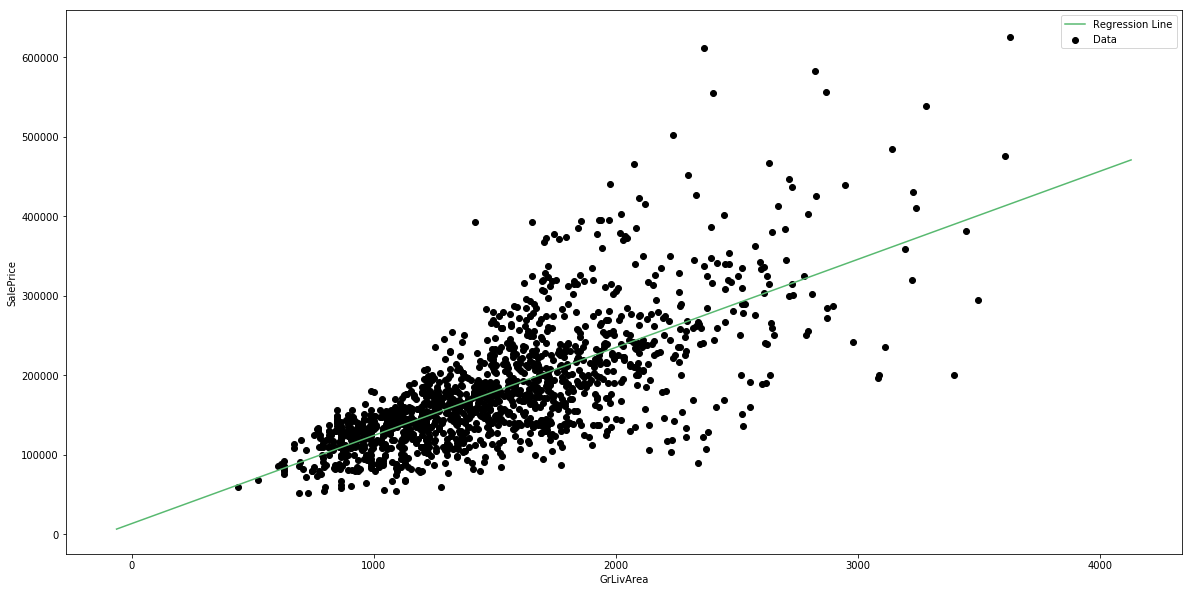

In [26]:
max_X = np.max(X) + 500
min_X = np.min(X) - 500

### Choose points evenly spaced between min_x in max_x
reg_x = np.linspace(min_X, max_X, 1000)

### Use the equation for our line to calculate y values
reg_y = weights[0][0] + weights[1][0] * reg_x

plt.plot(reg_x, reg_y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, c='k', label='Data')

plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

#### Model Evalutaion Intro
Further lessons will discuss model evaluation scores in more detail, quickly, here we will calculate root mean squared errors with our calculated weights

In [27]:
### GRADED
### True or False
### The Root Mean Square Error is in the same units as the data
### assign boolean response to ans1
### YOUR ANSWER BELOW

ans1 = True

In [28]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


#### Calculating RMSE

In [29]:
rmse = 0

b0 = weights[0][0]
b1 = weights[1][0]

for i in range(len(Y)):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/len(Y))
print(rmse)

53092.484869486616


#### Calculating $R^2$

In [30]:
ss_t = 0
ss_r = 0

mean_y = np.mean(Y)

for i in range(len(Y)):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)

print(r2)

0.5163484562864966


### sklearn implementation

While it is useful to build and program our model from scratch, this course will also introduce how to use conventional methods to fit each model. In particular, we will be using the `scikit-learn` module (also called `sklearn`.)  

Check to see how close your answers are!

In [31]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

### sklearn requires a 2-dimensional X and 1 dimensional y. The below yeilds shapes of:
### skl_X = (n,1); skl_Y = (n,)
skl_X = df_sub_cutoff[['GrLivArea']]
skl_Y = df_sub_cutoff['SalePrice']

lr.fit(skl_X,skl_Y)
print("Intercept:", lr.intercept_)
print("Coefficient:", lr.coef_)

Intercept: 13454.066705758654
Coefficient: [110.78992341]
